# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

## Задача    
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных
`hypothesis.csv`:    
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.    


`orders.csv`:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.    


`visitors.csv`:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста



# Импорт библиотек

In [5]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Импорт и изучение данных

In [6]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

## hypothesis

In [7]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [8]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
# поиск дублей
print('Дубликаты: {}'.format(hypothesis.duplicated().sum()))

Дубликаты: 0


In [10]:
# поиск пропусков
print(f'Пропуски:',hypothesis.isna().sum())

Пропуски: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


In [11]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [12]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis['hypothesis'] = hypothesis['hypothesis'].str.lower()

In [13]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика,...",3,10,8,6
1,"запустить собственную службу доставки, что сок...",2,5,4,10
2,добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"изменить структура категорий, что увеличит кон...",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,показать на главной странице баннеры с актуаль...,5,3,8,3
7,добавить форму подписки на все основные страни...,10,7,8,5
8,"запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Вывод:**   
    - дубликаты, пропуски, аномалии = отсутствуют;        
    - регистр букв скорректирован по всей таблице.

## orders

In [14]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
# поиск дублей
print('Дубликаты: {}'.format(orders.duplicated().sum()))

Дубликаты: 0


In [17]:
# поиск пропусков
print(f'Пропуски:',orders.isna().sum())

Пропуски: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [18]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [19]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [20]:
print('Данные лежат в диапаоне дат от', orders['date'].min(), 'до', orders['date'].max())

Данные лежат в диапаоне дат от 2019-08-01 00:00:00 до 2019-08-31 00:00:00


**Вывод:**    
дублей и пустых значений нет. Есть аномалии в revenue.
Потребовалось скорректиторовать формат даты.

## Visitors

In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [23]:
# поиск пропусков
print(f'Пропуски:',visitors.isna().sum())

Пропуски: date        0
group       0
visitors    0
dtype: int64


In [24]:
# поиск дублей
print('Дубликаты: {}'.format(visitors.duplicated().sum()))

Дубликаты: 0


In [25]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [26]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [27]:
print('Данные лежат в диапаоне дат от', visitors['date'].min(), 'до', visitors['date'].max())

Данные лежат в диапаоне дат от 2019-08-01 00:00:00 до 2019-08-31 00:00:00


**Вывод:**
аномалий, дублей и пустых значений нет. Потребовалось скорректиторовать формат даты.    
Диапазон дат заказов и визитов совпадает.


# Приоритизация гипотез
## ICE

Рассчиать ICE, отсортировать по убыванию приоритета.    
Формула: ICE = (impact * confidence) / efforts

In [28]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика,...",3,10,8,6
1,"запустить собственную службу доставки, что сок...",2,5,4,10
2,добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"изменить структура категорий, что увеличит кон...",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,показать на главной странице баннеры с актуаль...,5,3,8,3
7,добавить форму подписки на все основные страни...,10,7,8,5
8,"запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [29]:
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
hypothesis.sort_values(by='ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
0,"добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
7,добавить форму подписки на все основные страни...,10,7,8,5,11.2
6,показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"запустить собственную службу доставки, что сок...",2,5,4,10,2.0
5,"добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3
3,"изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


## RICE
Рассчиать RICE, отсортировать по убыванию приоритета.    
Формула: ICE = (reach * impact *confidence) / efforts

In [30]:
hypothesis['rice'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']).round(1)
hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,ice,rice
7,добавить форму подписки на все основные страни...,11.2,112.0
2,добавить блоки рекомендаций товаров на сайт ин...,7.0,56.0
0,"добавить два новых канала привлечения трафика,...",13.3,40.0
6,показать на главной странице баннеры с актуаль...,8.0,40.0
8,"запустить акцию, дающую скидку на товар в день...",16.2,16.2
3,"изменить структура категорий, что увеличит кон...",1.1,9.0
1,"запустить собственную службу доставки, что сок...",2.0,4.0
5,"добавить страницу отзывов клиентов о магазине,...",1.3,4.0
4,"изменить цвет фона главной страницы, чтобы уве...",1.0,3.0


## Разница приоритетов

При помощи heatmap отобразим разницу приоритетов, в зависимости от вырбранного метода оценивания гипотез

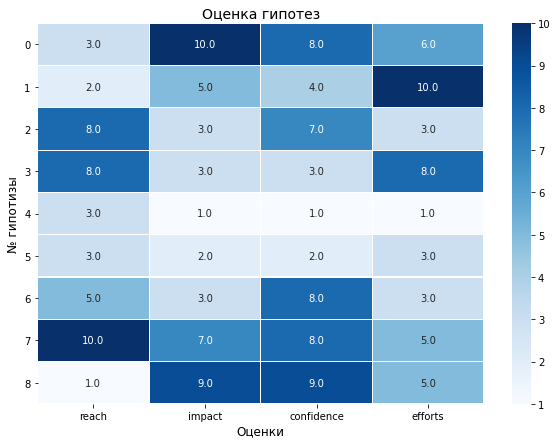

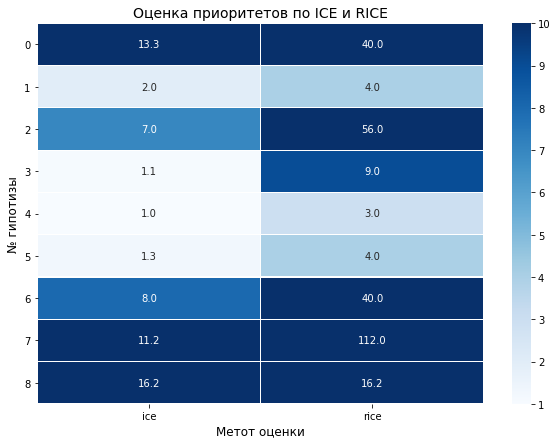

In [31]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(hypothesis[['reach', 'impact', 'confidence', 'efforts']], fmt='.1f', linecolor='white', cmap="Blues", annot=True,  linewidths=0.1, vmax = 10)
plt.title('Оценка гипотез', size = 14)
ax.set_ylabel('№ гипотизы', size = 12)
ax.set_xlabel('Оценки', size = 12)
plt.yticks(rotation = 0)

plt.show()
plt.figure(figsize=(10, 7))
ax = sns.heatmap(hypothesis[['ice', 'rice']], fmt='.1f', linecolor='white', cmap="Blues", annot=True,  linewidths=0.1, vmax = 10)
plt.title('Оценка приоритетов по ICE и RICE', size = 14)
ax.set_ylabel('№ гипотизы', size = 12)
ax.set_xlabel('Метот оценки', size = 12)
plt.yticks(rotation = 0)
plt.show()


**Вывод:**

По методу ICE наиболее перспективные гипотезы:
 - 8, 0 и 13.    
Но если использовать метот RICE, который учитывает охват пользователей (Reach), приоритетными становяться:
 - 7, 2, 0 и 6
Всё-таки охват пользователей оказывает силное влияение. В нашем случае у гиотизы 7 охват = 10, а у гипотизы 2 и 3 = 8. Гипотеза 3 не попала в данную выборку, так как она дороже (efforts) 2.6 раза, чем 2.    
Гипотеза 0 - оказывает высокое влияние на пользователей, а гипотеза 6 имеет оценку уверенности (confidence) = 8, при том она не являтеся дорогой.    

Для теста советую выбрать гипотезы, 7, 2, 0. Так как по оценкам 7-ая и 2-ая имеют высокий охват, а значит мы без проблем найдём нужное количесво трафика. А гипотеза 0 дополнит данное тестирование, ведь при успешном тестировании мы получим +30% трафика. Но если у нас проблема с остатками, то стоит выбрать гипотезу 6.

# Анализ A/B теста
## График кумулятивной выручки по группам

Создадим df `datesGroups` с уникальными парами значений 'date' и 'group', таблицы orders. 
Избавимся от дубликатов.

In [32]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head(2)

,date,group
0,2019-08-15,B
2,2019-08-15,A


Объявляем переменную `ordersAggregated`, содержащую:
 - дату;
 - группу A/B-теста;
 - число уникальных заказов в группе теста по указанную дату включительно;
 - число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
 - суммарную выручку заказов в группе теста по указанную дату включительно.

In [33]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "transactionId": pd.Series.nunique,
            "visitorId": pd.Series.nunique,
            "revenue": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])

Обявляем переменную `visitorsAggregated`, содержащую:     
    - дату;    
    - группу A/B-теста;      
    - количество уникальных посетителей в группе теста по указанную дату включительно.

In [34]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Определим переменную `cumulativeData`, объединив `ordersAggregated` и `visitorsAggregated` по колонкам 'date', 'group'

In [35]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Объявим переменные `cumulativeRevenueA`, `cumulativeRevenueB`, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.

In [36]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [37]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим графики кумулятивной выручки по дням по группам

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


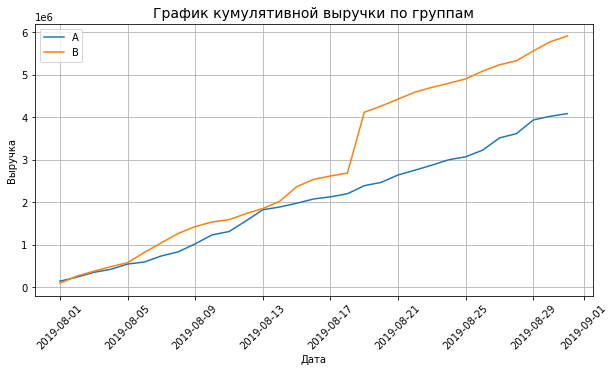

In [38]:
plt.rcParams['figure.figsize']=(10,5)
sns.lineplot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
sns.lineplot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', size=14)
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()

**Вывод:** тестрование шло равномерно, но в середине теста сегмент 'B' вырвался вперед и продолжил лидировать.
Это указывает на влияение аномально больших заказов или о всплеске количества заказов.

## График среднего чека по группам

Разделим кумулятивную выручку на кумулятивное число заказов.

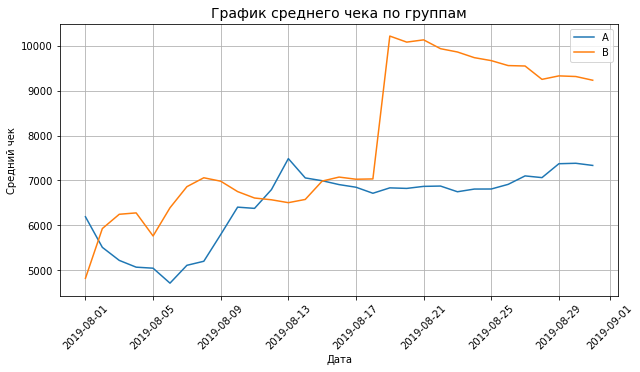

In [39]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.rcParams['figure.figsize']=(10,5)
plt.title('График среднего чека по группам', size=14)
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()

**Вывод:** 2019-08-17 сегмент 'B' сильно вырос, после плавно снижается. Решение по этому метрике принимать рано, нужно сделать анализ выбросов или получить ещё больше данных, чтобы прийти к реальному среднему чеку.

## График относительного различия для среднего чека

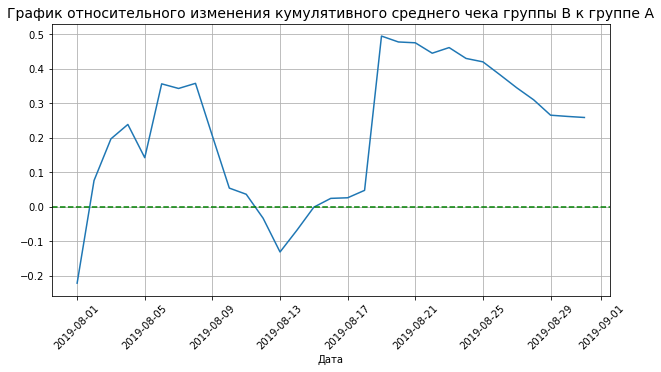

In [40]:
# объеденим таблицы
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавим ось X
plt.axhline(y=0, color='green', linestyle='--') 
plt.rcParams['figure.figsize']=(10,5)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size=14)
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.grid()

**Вывод:**  Из-за крупных заказов, график сильно «скачет». Нужно найти их и исключить.

## График кумулятивной конверсии

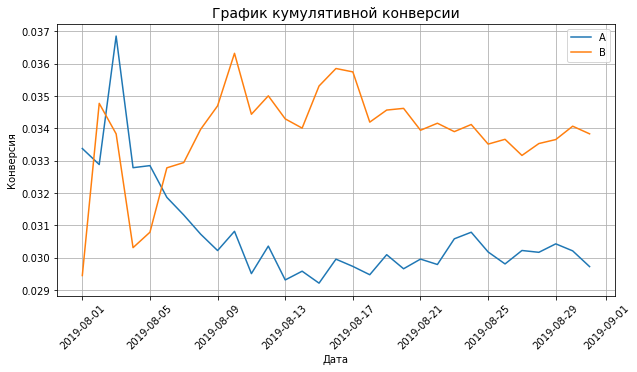

In [41]:
# посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделеяем данные на группу A и B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.rcParams['figure.figsize']=(10,5)
plt.title('График кумулятивной конверсии', size=14)
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()

**Вывод:**
    получили ассиметричный график. В начале теста конверсии почти симметричны, затем конверсия группы A резко проседает, а конверсия группы B резко растёт. После данных скачков, конверсии зафиксировались.     
    На момент окончания теста:      
        - конверсия группы А ~ 0.030     
        - конверсия группы B ~ 0.034

In [42]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


## График относительного различия кумулятивных конверсий

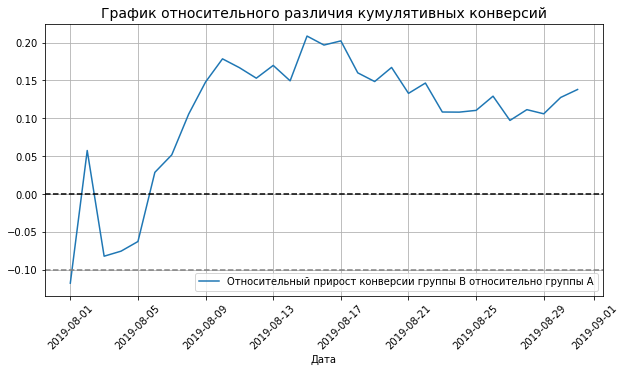

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.rcParams['figure.figsize']=(10,5)
plt.title('График относительного различия кумулятивных конверсий', size=14)
plt.xlabel("Дата")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()

**Вывод:**  начиная с 2019-08-05 группа B уверенно лидирует по конверсии.
Но чтобы сделать более уверенный вывод, в пользу какого-либо сегмента, нужно больше дней теста или выполнить анализ аномалий.

## Точечный график количества заказов по пользователям¶

In [44]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


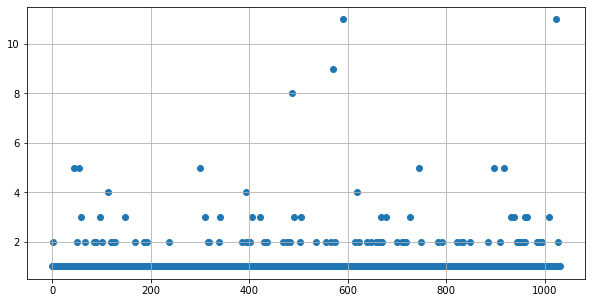

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.grid()
plt.show()

**Вывод:** много пользователей с 2 и 3 заказми, точная доля их не ясна. Пока не понятно, считать их аномалиями или нет.

## Рассчёт 95-ого и 99-ого перцентиля количества заказов на пользователя

In [46]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


**Вывод:** не более 5% пользователей офрмляли более чем 2 заказа. И только 1% пользователей заказывали более 4 заказов.
Всё что за 99% - является аномалией.

## Точечный график стоимостей заказов

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


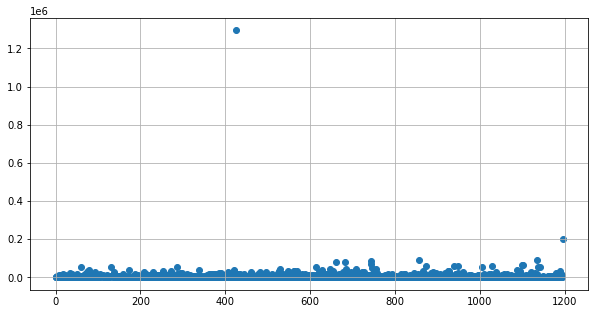

In [47]:
print(orders.sort_values(by='revenue',ascending=False).head(10))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.show()

**Вывод:** имеем два выброса.

## Рассчёт 95-й и 99-й перцентили стоимости заказов

In [48]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


**Вывод:** имеем 5% заказов на сумму 2800, и 1% заказов на сумму 582233.2. Всё что за 95% - является аномалией

## Статистическая значимость различий в конверсию между группами по «сырым» данным

H0: Конверсия в группе A равна конверсии в группе B     
H1: Конверсия в группе A НЕ равна конверсии в группе B

In [49]:
cumulativeDataA.head(3)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856


In [50]:
cumulativeDataB.head(3)

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833


In [51]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# visitorsADaily.head()
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [52]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [53]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [54]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [55]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.1%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.007
14.4%


**Вывод:** p-value = 0.007 меньше 0.05, отвергаем нулевую гипотезу. Анализ по «сырым» данным говорит, что между группами есть стастисически значимые различия.      
Относительный прирост конверсии группы B к конверсии группы A = 14.4%

## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

H0: Средний чек группы A равен среднему чеку группы B     
H1: Средний чек группы A НЕ равен среднему чеку группы B

In [56]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
25.9%


**Вывод:** p-value больше 0.05 - статистически значимых отличий в среднем череке между группа нет, принимаем H0. Относитительное различие среднего чека между сегментами составляет 25.9%

## Статистическая значимость различий в конверсию между группами по «очищенным» данным

H0: Конверсия в группе A равна конверсии в группе B     
H1: Конверсия в группе A НЕ равна конверсии в группе B

In [57]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['transactionId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

858     192721366
1099    316924019
1087    324171086
751     348143148
1029    469609643
dtype: int64
(64,)


**Вывод:** всего 64 аномальных заказа

In [58]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.008
14.9%


**Вывод:** результаты конверсии практически не изменились. p-value меньше 0.05, отвергаем нулевую гипотезу, конверсия в группе A не равна конверсии в группе B.

## Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

H0: Средний чек группы A равен среднему чеку группы B     
H1: Средний чек группы A НЕ равен среднему чеку группы B

In [59]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.497
24.2%


**Вывод:** p-value больше 0.05, принимаем H0 - средний чек группы A равен среднему чеку группы B.
p-value увеличился, но и разница между сегментами сократилась с 25.9% до 24.2%. Разница составляет 1.7%.

# Общий вывод    


Факты:   
    - Есть статистически значимые различия по конверсии между группам по «сырым» и по отфильтрованным данным;    
    - Нет статистически значимого различия по среднему чеку между группам ни по «сырым», ни по отфильтрованным данным;    
    - График различия конверсии между группами сообщает, что результаты группы A хуже группы B и нет значительной тенденции к улучшению:
    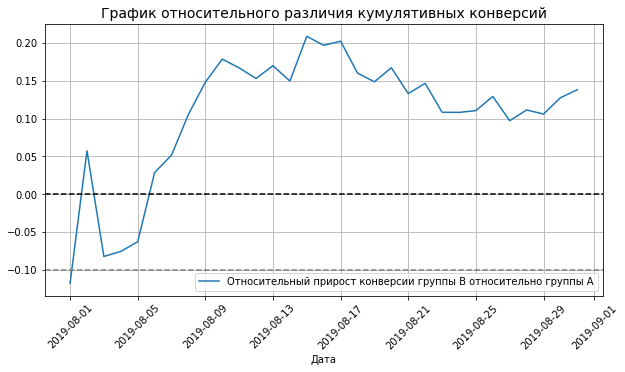
    - График различия среднего чека говорит о том, что результаты группы B лушчше и сейчас приблизительно на 25% лучше:
    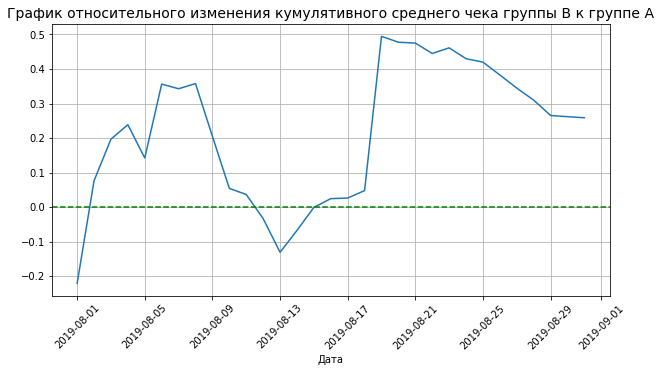
Предлагаемое решение: остановить тест, зафиксировать победу группы B.